# Data Project - Stock Market Analysis 

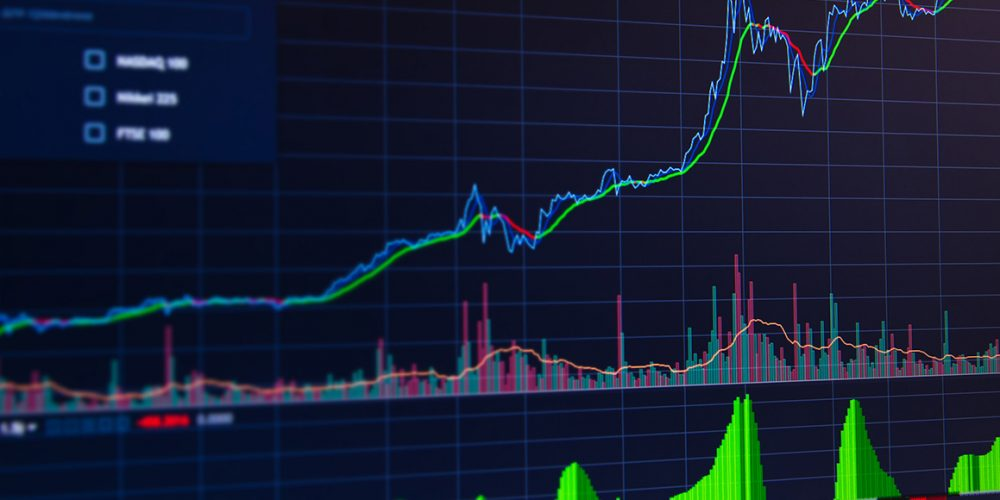

 we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    4.) How much value do we put at risk by investing in a particular stock?
    5.) Technical indicators
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using SVR, RFR,KNN,LSTM)
   

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [153]:
# library using for data visualization
import pandas as pd  
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import math
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

#  reading stock data from yahooFinance
from pandas_datareader.data import DataReader
import yfinance as yf
import pandas as pd

# using plotlib for draw  graphs  
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.colors

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

# setup layout for  library go 
temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), width=800))
colors=px.colors.qualitative.Plotly
# set up style for library searborn , matplotlib 
sns.set_style("whitegrid") 
plt.style.use("fivethirtyeight") 

In [168]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL',  'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, "2018-01-01", end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [169]:
company_list = [AAPL, AMZN]
company_name = ["APPLE", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-10-26,116.000000,119.349998,114.760002,115.660004,115.660004,68802300,AMAZON
2022-10-27,113.919998,114.120003,109.769997,110.959999,110.959999,129605400,AMAZON
2022-10-28,97.910004,103.959999,97.660004,103.410004,103.410004,223133400,AMAZON
2022-10-31,103.559998,104.870003,100.739998,102.440002,102.440002,99251400,AMAZON
2022-11-01,103.989998,104.580002,96.059998,96.790001,96.790001,153370000,AMAZON
2022-11-02,97.320000,97.739998,92.010002,92.120003,92.120003,135761800,AMAZON
2022-11-03,92.470001,93.500000,89.019997,89.300003,89.300003,136683300,AMAZON
2022-11-04,91.489998,92.440002,88.040001,90.980003,90.980003,128999900,AMAZON
2022-11-07,91.949997,92.099998,89.040001,90.529999,90.529999,77495700,AMAZON


In [201]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1190 non-null   datetime64[ns]
 1   Open          1190 non-null   float64       
 2   High          1190 non-null   float64       
 3   Low           1190 non-null   float64       
 4   Close         1190 non-null   float64       
 5   Adj Close     1190 non-null   float64       
 6   Volume        1190 non-null   int64         
 7   company_name  1190 non-null   object        
 8   Daily Return  1190 non-null   float64       
 9   EMA_9         1190 non-null   float64       
 10  SMA_5         1190 non-null   float64       
 11  SMA_10        1190 non-null   float64       
 12  SMA_15        1190 non-null   float64       
 13  SMA_30        1190 non-null   float64       
 14  RSI           1190 non-null   float64       
 15  MACD          1190 non-null   float64 

Checking Null/NA value and remove it

In [202]:
# kiem tra xem co du lieu is null
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
Daily Return    0
EMA_9           0
SMA_5           0
SMA_10          0
SMA_15          0
SMA_30          0
RSI             0
MACD            0
MACD_signal     0
dtype: int64

Drop NAN value

In [203]:
df.dropna(inplace=True)
df.isna().any()

Date            False
Open            False
High            False
Low             False
Close           False
Adj Close       False
Volume          False
company_name    False
Daily Return    False
EMA_9           False
SMA_5           False
SMA_10          False
SMA_15          False
SMA_30          False
RSI             False
MACD            False
MACD_signal     False
dtype: bool

Import Reliance dataset  using YahooFinance

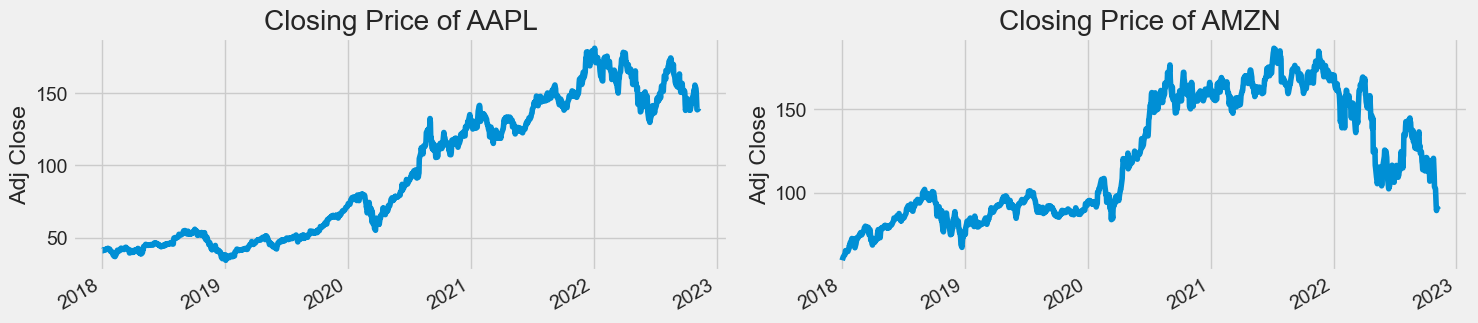

In [170]:
# Let's see a historical view of the closing price

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

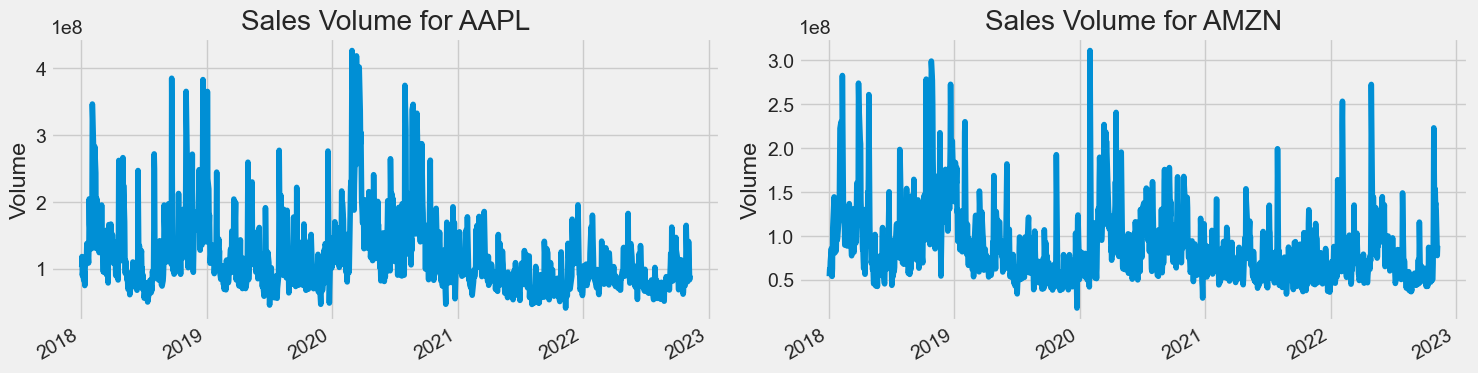

In [171]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Now let's go ahead and plot all the additional Moving Averages

In [161]:
# df.groupby("company_name").hist(figsize=(12, 12));

In [162]:
# fig, axes = plt.subplots(nrows=2, ncols=2)
# fig.set_figheight(8)
# fig.set_figwidth(15)

# AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
# axes[0,0].set_title('APPLE')

# AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
# axes[0,1].set_title('AMAZON')

# fig.tight_layout()

# 2. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

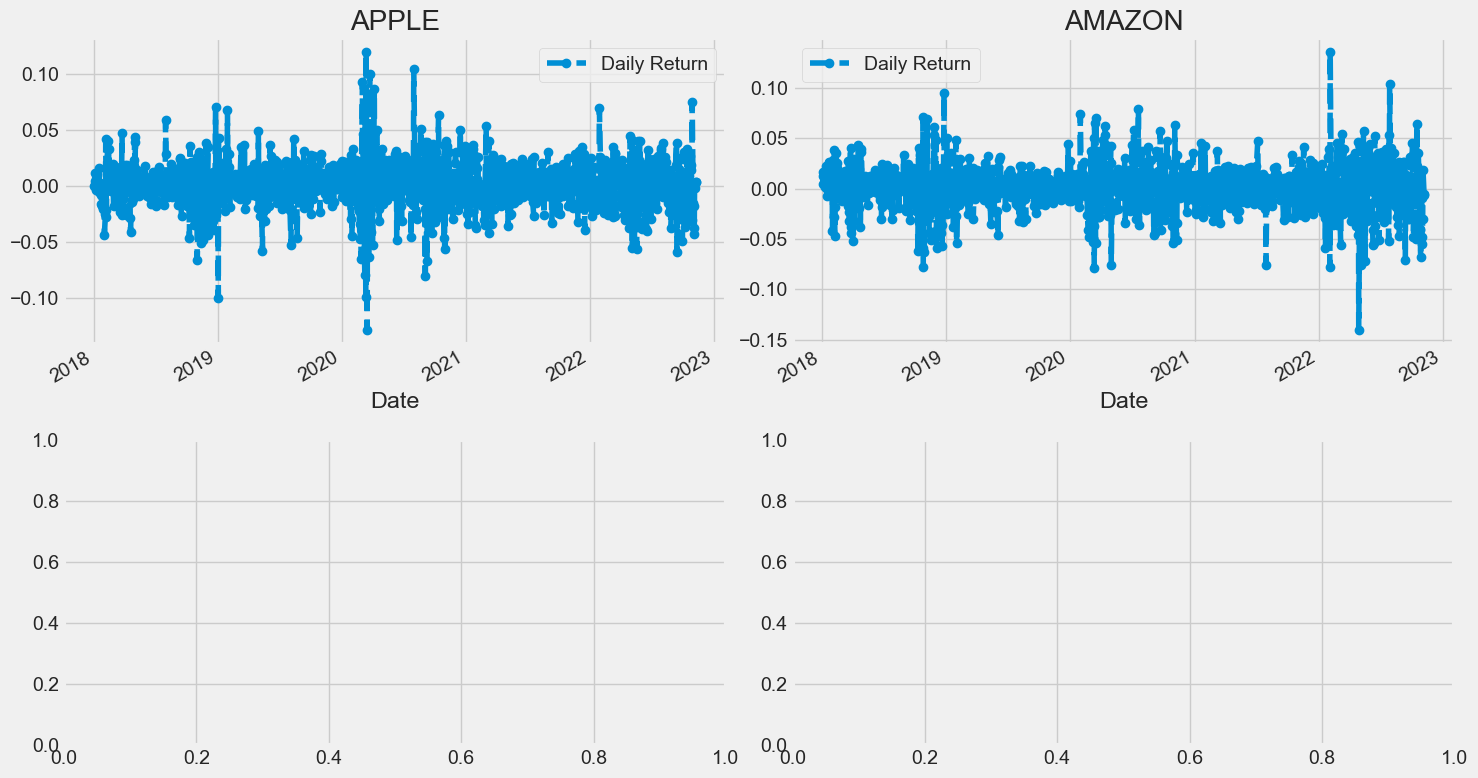

In [172]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

AMZN['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

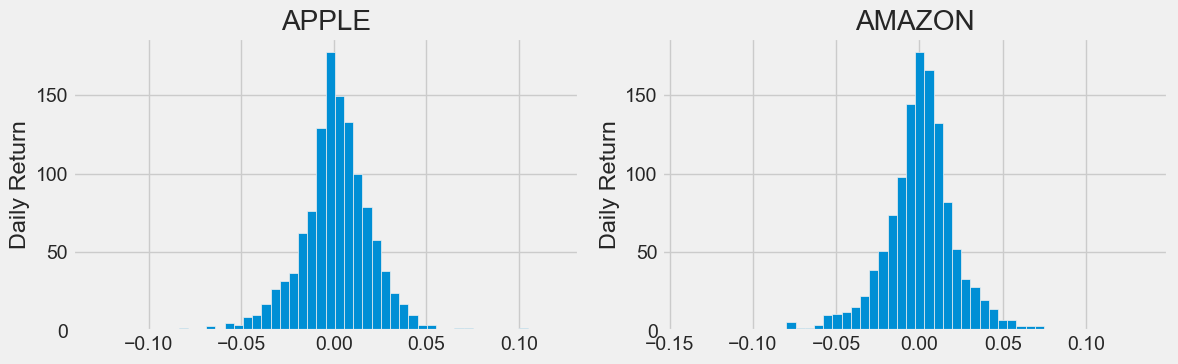

In [173]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 4. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

In [165]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

NameError: name 'tech_rets' is not defined

# 5. Technical indicators

In [174]:
AAPL.reset_index(inplace = True)

In [175]:



def print_chart (df):
    df['EMA_9'] = df['Close'].ewm(9).mean().shift()
    df['SMA_5'] = df['Close'].rolling(5).mean().shift()
    df['SMA_10'] = df['Close'].rolling(10).mean().shift()
    df['SMA_15'] = df['Close'].rolling(15).mean().shift()
    df['SMA_30'] = df['Close'].rolling(30).mean().shift()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.Date, y=df.EMA_9, name='EMA 9'))
    fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_5, name='SMA 5'))
    fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_10, name='SMA 10'))
    fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_15, name='SMA 15'))
    fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_30, name='SMA 30'))
    fig.add_trace(go.Scatter(x=df.Date, y=df.Close, name='Close', opacity=0.2))
    fig.show()
   
print_chart(AAPL)


RSI =>  Relative Strength Indicator

In [176]:
def releatvive_strength_index(df, n = 14):
    close = df['Close']
    delta = close.diff() # lay nhung gia tri uniquy trong  du lieu close 
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0 ] = 0
    pricesDown[pricesDown >  0 ] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi;


AAPL['RSI'] = releatvive_strength_index(AAPL).fillna(0)
fig = go.Figure(go.Scatter(x = AAPL.Date, y = AAPL.RSI, name="RSI"))
fig.show()



MACD =>  Moving Average Convergence Divergence 

In [177]:
# df = AAPL.copy()
EMA_12 = pd.Series(AAPL['Close'].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(AAPL['Close'].ewm(span=26, min_periods=26).mean())
AAPL['MACD'] = pd.Series(EMA_12 - EMA_26)
AAPL['MACD_signal'] = pd.Series(AAPL.MACD.ewm(span=9, min_periods=9).mean())

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=AAPL.Date, y=AAPL.Close, name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=AAPL.Date, y=EMA_12, name='EMA 12'), row=1, col=1)
fig.add_trace(go.Scatter(x=AAPL.Date, y=EMA_26, name='EMA 26'), row=1, col=1)
fig.add_trace(go.Scatter(x=AAPL.Date, y=AAPL['MACD'], name='MACD'), row=2, col=1)
fig.add_trace(go.Scatter(x=AAPL.Date, y=AAPL['MACD_signal'], name='Signal line'), row=2, col=1)
fig.show()

In [178]:
df = AAPL.iloc[33:].copy()
df.index = range(len(df))

In [179]:


dataset = df[['EMA_9','SMA_5','SMA_10','SMA_15','SMA_30','RSI','MACD','MACD_signal','Close']]
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]



Split data for training and testing
Ratio for training and testing data is 70:30

In [180]:

test_size  = 0.3

test_split_idx  = int(dataset.shape[0] * (1-test_size))

train_data  = dataset[:test_split_idx].copy()

test_data   = dataset[test_split_idx+1:].copy()
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
    



train_data:  (833, 9)
test_data:  (356, 9)


In [181]:
X_train = train_data.iloc[:,0:8].to_numpy()
y_train = train_data.iloc[:,0].to_numpy()
X_test = test_data.iloc[:,0:8].to_numpy()
y_test = test_data.iloc[:,0].to_numpy()


Normalizing / scaling close value between 0 to 1

In [182]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [183]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)

Algorithms

Random Forest Regressor - RFR

In [184]:
from sklearn.ensemble import RandomForestRegressor
# khoi tao doi tuong cua thua toan rf sau do goi ham dua vao train data(feature), y_train chinh la ket qua theo tap test nay (label)
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

C:\Users\loc28\AppData\Local\Temp\ipykernel_1856\239946564.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(random_state=0)

In [185]:

test_predict=regressor.predict(X_test)
print("Test data prediction:", test_predict.shape)


Test data prediction: (356,)


Transform back to original form

In [186]:
test_predict = test_predict.reshape(-1,1)
test_predict = scaler.inverse_transform(test_predict)

In [187]:
y_test = scaler.inverse_transform(y_test)

In [188]:
test_predict = test_predict.reshape(-1)
y_test = y_test.reshape(-1)

Evaluation metrices

In [189]:
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))
print("----------------------------------------------------------------------")
print("Test data explained variance regression score:", explained_variance_score(y_test, test_predict))
print("----------------------------------------------------------------------")
print("Test data R2 score:", r2_score(y_test, test_predict))
print("----------------------------------------------------------------------")
print("Test data MGD: ", mean_gamma_deviance(y_test, test_predict))
print("Test data MPD: ", mean_poisson_deviance(y_test, test_predict))

Test data RMSE:  0.6879550347058008
Test data MSE:  0.4732821297770595
Test data MAE:  0.5050535944228521
----------------------------------------------------------------------
Test data explained variance regression score: 0.9971202452529667
----------------------------------------------------------------------
Test data R2 score: 0.9966254347148523
----------------------------------------------------------------------
Test data MGD:  2.060872678288168e-05
Test data MPD:  0.0031188943602029565


Define a function using for show chart predict 

In [190]:
def showChartPredict(df,test_predict):
    
    predicted_prices = df.loc[test_split_idx:test_split_idx+355].copy()
    predicted_prices['Close'] = test_predict

    fig = make_subplots(rows=2, cols=1)
    fig.add_trace(go.Scatter(x=df.Date, y=df.Close,
                            name='Truth',
                            marker_color='LightSkyBlue'), row=1, col=1)

    fig.add_trace(go.Scatter(x=predicted_prices.Date,
                            y=predicted_prices.Close,
                            name='Prediction',
                            marker_color='MediumPurple'), row=1, col=1)

    fig.add_trace(go.Scatter(x=predicted_prices.Date,
                            y=y_test,
                            name='Truth',
                            marker_color='LightSkyBlue',
                            showlegend=False), row=2, col=1)

    fig.add_trace(go.Scatter(x=predicted_prices.Date,
                            y=test_predict,
                            name='Prediction',
                            marker_color='MediumPurple',
                            showlegend=False), row=2, col=1)
    fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
    # fig.update_traces(marker_line_width=4, opacity=0.8)

    fig.show()
    

In [191]:
showChartPredict(df,test_predict)

Super vector regression - SVR

In [192]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel= 'rbf', C= 1e2, gamma= 0.1)
svr_rbf.fit(X_train, y_train)

C:\Users\loc28\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=100.0, gamma=0.1)

In [193]:
test_predict=svr_rbf.predict(X_test)

In [194]:
test_predict = test_predict.reshape(-1,1)

In [195]:
test_predict = scaler.inverse_transform(test_predict)

In [196]:
y_test = y_test.reshape(-1,1)

In [197]:
y_test = scaler.inverse_transform(y_test)

In [198]:
test_predict = test_predict.reshape(-1)
y_test = y_test.reshape(-1)

In [199]:
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))
print("----------------------------------------------------------------------")
print("Test data explained variance regression score:", explained_variance_score(y_test, test_predict))
print("----------------------------------------------------------------------")
print("Test data R2 score:", r2_score(y_test, test_predict))
print("----------------------------------------------------------------------")
print("Test data MGD: ", mean_gamma_deviance(y_test, test_predict))
print("Test data MPD: ", mean_poisson_deviance(y_test, test_predict))

Test data RMSE:  7509.816163457888
Test data MSE:  56397338.80893336
Test data MAE:  7488.297704130046
----------------------------------------------------------------------
Test data explained variance regression score: 0.033261766753151845
----------------------------------------------------------------------
Test data R2 score: -167.93501948882306
----------------------------------------------------------------------
Test data MGD:  89.78253714232642
Test data MPD:  44763.4091837109


In [200]:
showChartPredict(df,test_predict)

K-nearest neighgbour - KNN

In [ ]:
from sklearn import neighbors

K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [ ]:
test_predict=neighbor.predict(X_test)

Transform back to original form

In [ ]:
test_predict = test_predict.reshape(-1,1)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

In [ ]:
test_predict = test_predict.reshape(-1)
y_test = y_test.reshape(-1)

Evaluation Metrics 

In [ ]:
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))
print("----------------------------------------------------------------------")
print("Test data explained variance regression score:", explained_variance_score(y_test, test_predict))
print("----------------------------------------------------------------------")
print("Test data R2 score:", r2_score(y_test, test_predict))
print("----------------------------------------------------------------------")
print("Test data MGD: ", mean_gamma_deviance(y_test, test_predict))
print("Test data MPD: ", mean_poisson_deviance(y_test, test_predict))

In [ ]:
showChartPredict(df,test_predict)

LSTM

Tranform Data

In [ ]:

x0=[]
x1=[]
x2=[]
x3=[]
x4=[]
x5=[]
x6 = []
x7=[]
y=[]

In [ ]:
# tach rieng cac feature  va label can du doan ra thanh cac list
for i in range(0,dataset.shape[0]-15):
    x0.append(dataset.iloc[i:i+15,0])
    x1.append(dataset.iloc[i:i+15,1])
    x2.append(dataset.iloc[i:i+15,2])
    x3.append(dataset.iloc[i:i+15,3])
    x4.append(dataset.iloc[i:i+15,4])
    x5.append(dataset.iloc[i:i+15,5])
    x6.append(dataset.iloc[i:i+15,6])
    x7.append(dataset.iloc[i:i+15,7])
    y.append(dataset.iloc[i+15,8])

In [ ]:
# chuyen doi tu dang list sang dang mang 
x0,x1,x2,x3,x4,x5,x6,x7,y = np.array(x0),np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(x6),np.array(x7),np.array(y)

In [ ]:
y = np.reshape(y,(len(y),1))
y.shape

(1175, 1)

In [ ]:
# scaler du lieu ra de khong bi lech voi gia tri namg trong khoang tu 0-1
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0,1))
x0 = scaler.fit_transform(x0)
x1 = scaler.fit_transform(x1)
x2 = scaler.fit_transform(x2)
x3 = scaler.fit_transform(x3)
x4 = scaler.fit_transform(x4)
x5 = scaler.fit_transform(x5)
x6 = scaler.fit_transform(x6)
x7 = scaler.fit_transform(x7)
y = scaler.fit_transform(y)

In [ ]:
# gom cac feature lai thanh 1 mang va tao thanh khong gian 3 chieu de train cho thuat toan LSTM yeu cau 
X = np.stack([x0,x1,x2,x3,x4,x5,x6,x7],axis=2)
X.shape

(1175, 15, 8)

In [ ]:
# X_train, X_test = X[:-480],X[-480:]
# y_train, y_test = y[:-480],y[-480:]
# sau khi chia ra thanh hai phan feature va label voi step la 48 thi ta tien hanh chia tap train va tap test o moi phan theo ty le 
# 70% cho trainig va 30% cho test data
X_train,X_test = splitData(X)
y_train,y_test = splitData(y);


In [ ]:
X_train.shape

(822, 15, 8)

convert an array of values into a dataset 3D matrix 

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset.iloc[i:(i+time_step), 0:8]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset.iloc[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

reshape into X=t,t+1,t+2,t+3 and Y=t+4

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (772, 60, 8)
y_train:  (772,)
X_test:  (295, 60, 8)
y_test (295,)


Normalizing / scaling close value between 0 to 1

In [ ]:
y_test = y_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)


LSTM model structure

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=10)


Epoch 1/10
772/772 [==============================] - 38s 43ms/step - loss: 0.0025
Epoch 2/10
772/772 [==============================] - 33s 43ms/step - loss: 9.9336e-04
Epoch 3/10
772/772 [==============================] - 28s 36ms/step - loss: 7.9041e-04
Epoch 4/10
772/772 [==============================] - 29s 38ms/step - loss: 2.0279e-04
Epoch 5/10
772/772 [==============================] - 30s 39ms/step - loss: 2.8447e-04
Epoch 6/10
772/772 [==============================] - 28s 37ms/step - loss: 7.4420e-04
Epoch 7/10
772/772 [==============================] - 33s 43ms/step - loss: 8.6670e-05
Epoch 8/10
772/772 [==============================] - 25s 32ms/step - loss: 4.3704e-04
Epoch 9/10
772/772 [==============================] - 24s 31ms/step - loss: 1.8542e-04
Epoch 10/10
772/772 [==============================] - 27s 35ms/step - loss: 2.4146e-04


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 128)           70144     
                                                                 
 lstm_9 (LSTM)               (None, 64)                49408     
                                                                 
 dense_8 (Dense)             (None, 25)                1625      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 121,203
Trainable params: 121,203
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_predict = model.predict(X_test)

10/10 [==============================] - 1s 23ms/step


Transform back to original form

In [ ]:
test_predict = test_predict.reshape(-1,1)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

In [ ]:
test_predict = test_predict.reshape(-1)
y_test = y_test.reshape(-1)

Evaluation Metrics

In [ ]:
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))
print("----------------------------------------------------------------------")
print("Test data explained variance regression score:", explained_variance_score(y_test, test_predict))
print("----------------------------------------------------------------------")
print("Test data R2 score:", r2_score(y_test, test_predict))
print("----------------------------------------------------------------------")
print("Test data MGD: ", mean_gamma_deviance(y_test, test_predict))
print("Test data MPD: ", mean_poisson_deviance(y_test, test_predict))

Test data RMSE:  26.471077574638937
Test data MSE:  700.7179479625524
Test data MAE:  25.35166936234297
----------------------------------------------------------------------
Test data explained variance regression score: 0.4751228105268954
----------------------------------------------------------------------
Test data R2 score: -5.340040358311662
----------------------------------------------------------------------
Test data MGD:  0.02419505349582097
Test data MPD:  4.112064033465401


Comparision between original stock close price vs predicted close price

In [ ]:
predicted_prices = df.loc[test_split_idx:test_split_idx+294].copy()
predicted_prices['Close'] = test_predict

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=df.Date, y=df.Close,
                        name='Truth',
                        marker_color='LightSkyBlue'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                        y=predicted_prices.Close,
                        name='Prediction',
                        marker_color='MediumPurple'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                        y=y_test,
                        name='Truth',
                        marker_color='LightSkyBlue',
                        showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                        y=test_predict,
                        name='Prediction',
                        marker_color='MediumPurple',
                        showlegend=False), row=2, col=1)
# fig.update_traces(marker_line_width=4, opacity=0.8)

fig.show()